In [2]:
from datasets import load_dataset

ds = load_dataset("pontusnorman123/wildreceipt")

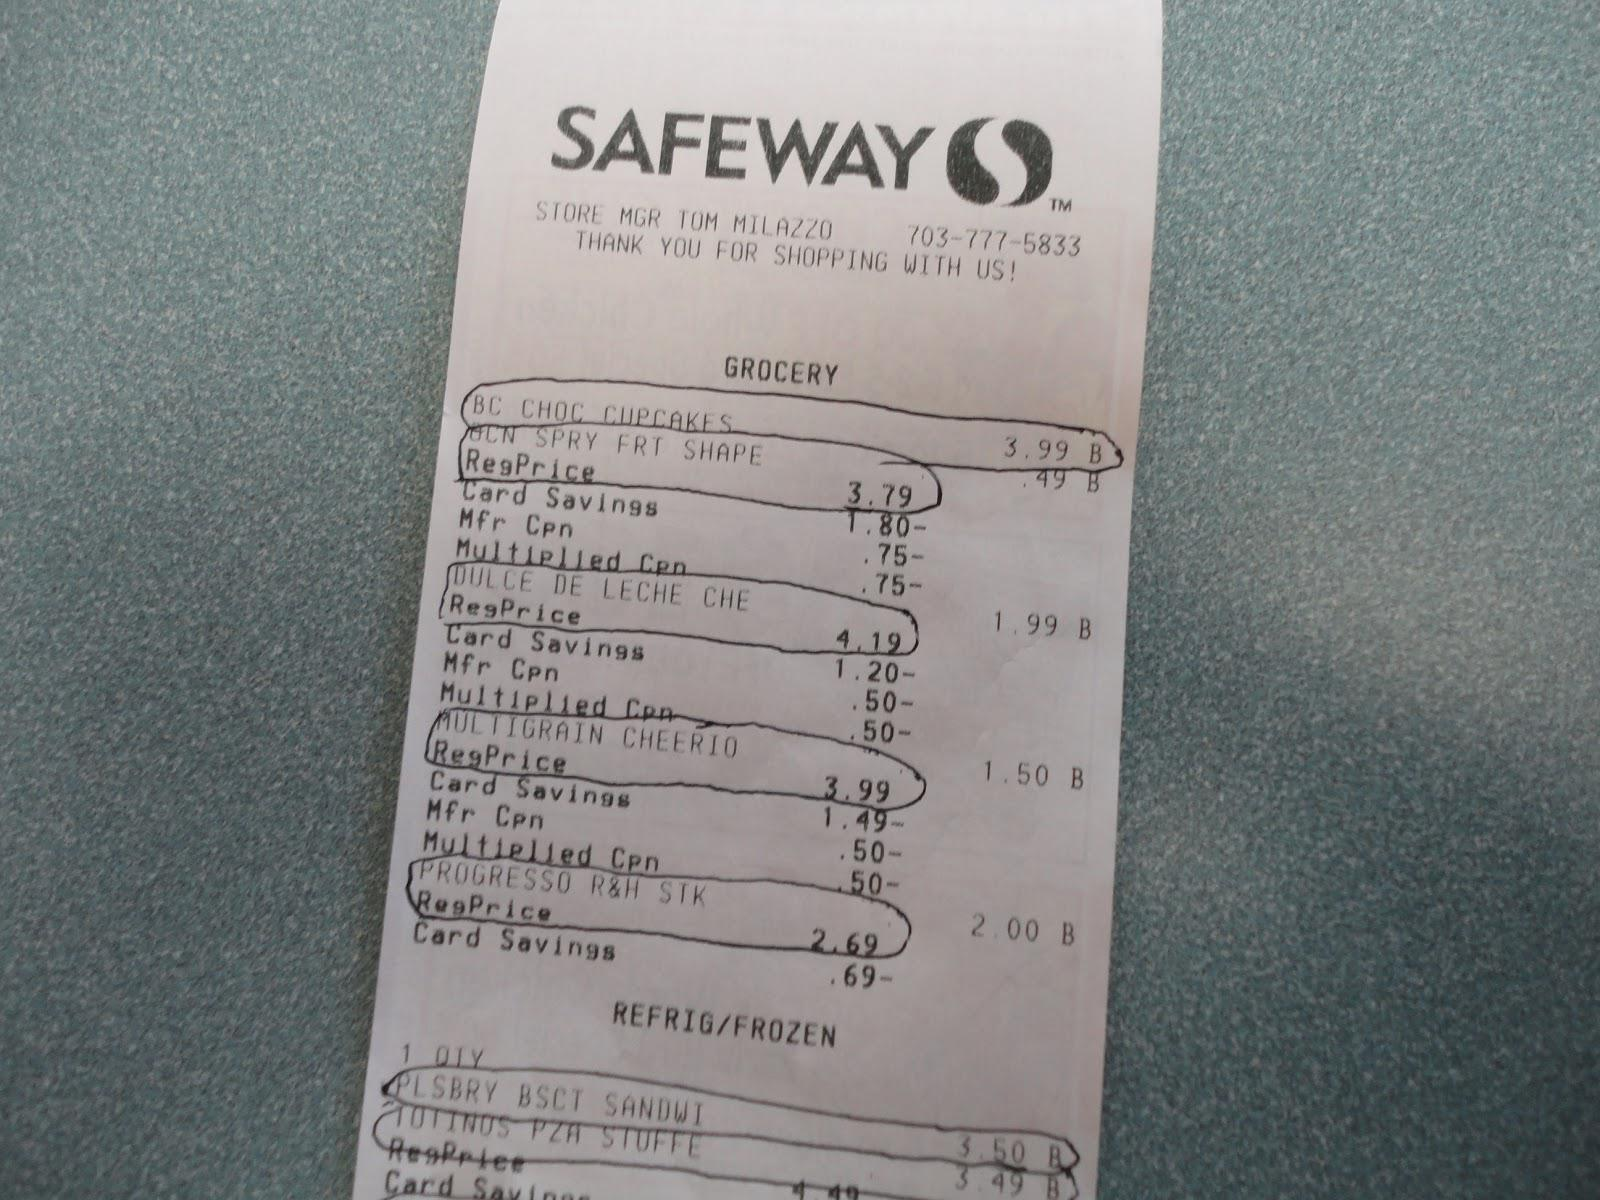

In [3]:
sample = ds["train"][0]['image']
sample

In [6]:
import pytesseract
import numpy as np

ocr_df = pytesseract.image_to_data(sample, output_type='data.frame')
ocr_df = ocr_df.dropna().reset_index(drop=True)
float_cols = ocr_df.select_dtypes('float').columns
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
words = ' '.join([word for word in ocr_df.text if str(word) != 'nan'])
words

'SAFEWAY (9. TORE MGR TQM MILAZZO (03-777 5833 THANK YOU f OR SHOPPING WITH US! GROCERY'

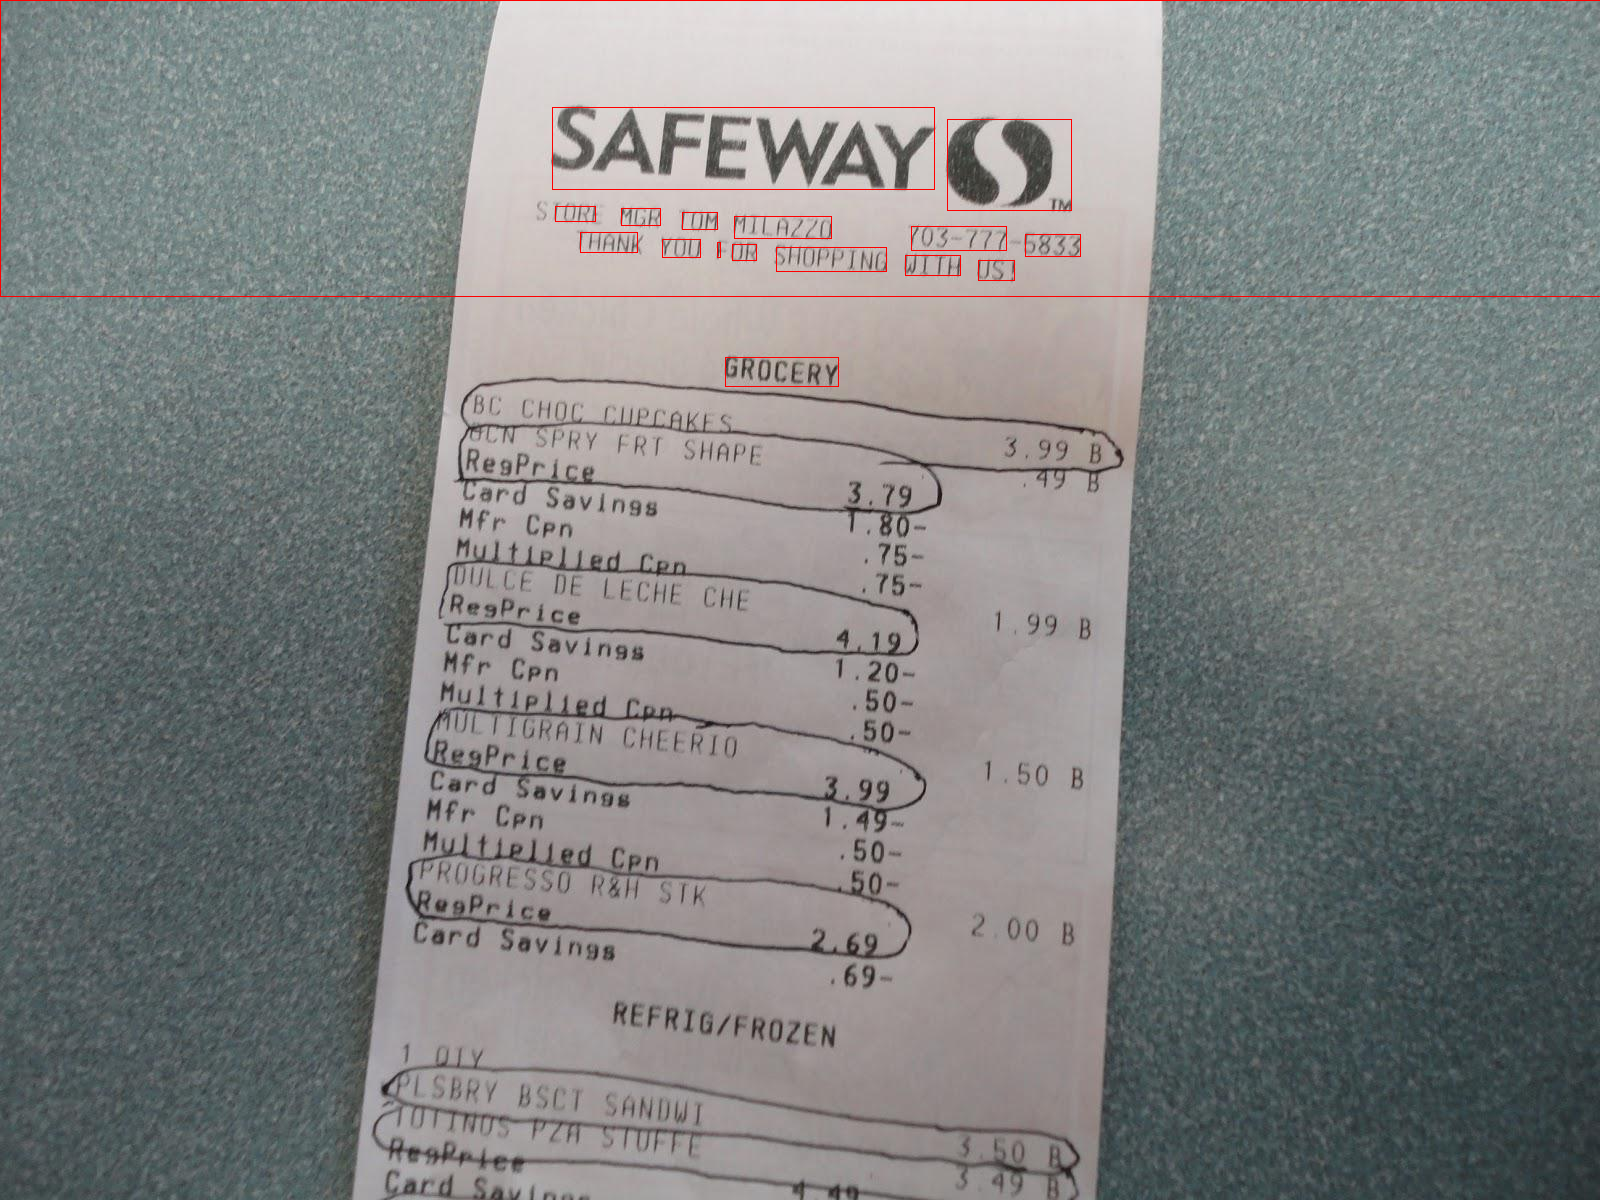

In [9]:
from PIL import Image, ImageDraw, ImageFont
coordinates = ocr_df[['left', 'top', 'width', 'height']]
actual_boxes = []
for idx, row in coordinates.iterrows():
    x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
    actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+width, top+height) to get the actual box 
    actual_boxes.append(actual_box)

draw = ImageDraw.Draw(sample, "RGB")
for box in actual_boxes:
  draw.rectangle(box, outline='red')

sample